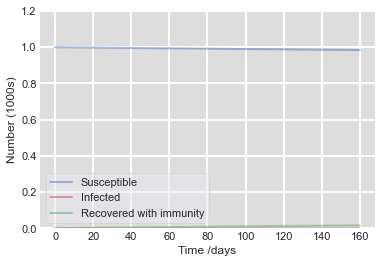

For beta=0.1 and r=0.1, R0=1.00. No epidemic


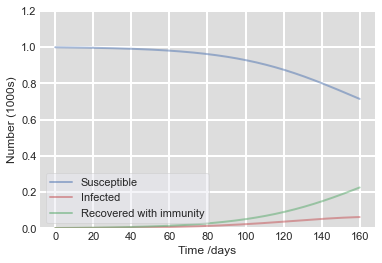

For beta=0.1 and r=0.06666666666666667, R0=1.50. No epidemic


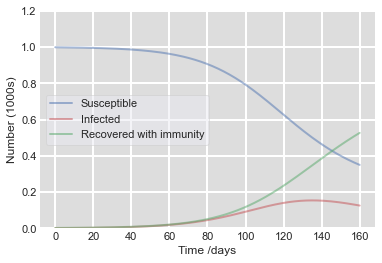

For beta=0.1 and r=0.05, R0=2.00. Epidemic occurred


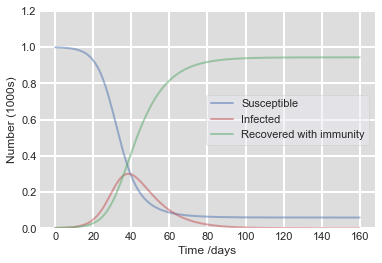

For beta=0.3 and r=0.1, R0=3.00. Epidemic occurred


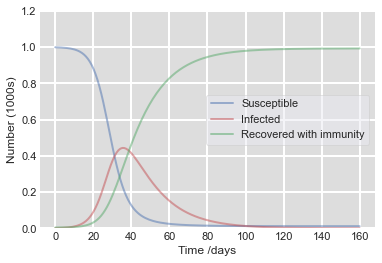

For beta=0.3 and r=0.06666666666666667, R0=4.50. Epidemic occurred


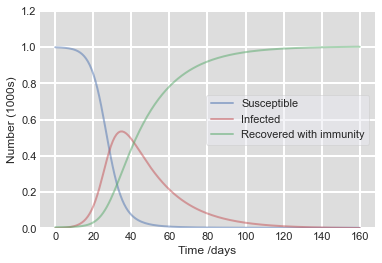

For beta=0.3 and r=0.05, R0=6.00. Epidemic occurred


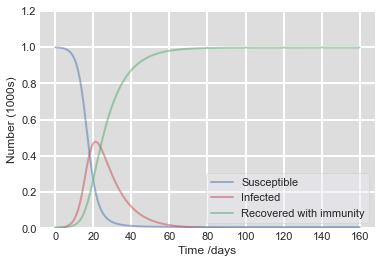

For beta=0.5 and r=0.1, R0=5.00. Epidemic occurred


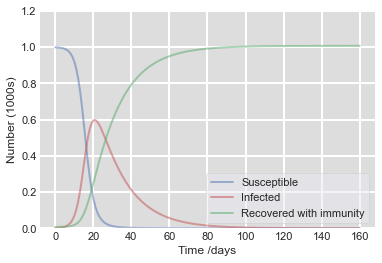

For beta=0.5 and r=0.06666666666666667, R0=7.50. Epidemic occurred


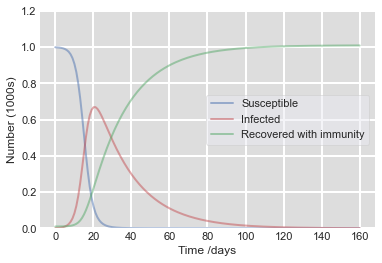

For beta=0.5 and r=0.05, R0=10.00. Epidemic occurred


In [60]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn style
sns.set()

# Total population, N
N = 1000
# Initial number of infected and recovered individuals, I0 and R0
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially
S0 = N - I0 - R0

# A grid of time points (in days)
t = np.linspace(0, 160, 160)

def sir(y, t, N, beta, r):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - r * I
    dRdt = r * I
    return dSdt, dIdt, dRdt

def simulate_epidemic(beta, r):
    # The SIR model differential equations

    # Initial conditions vector
    y0 = S0, I0, R0

    # Integrate the SIR equations over the time grid, t
    ret = odeint(sir, y0, t, args=(N, beta, r))
    S, I, R = ret.T

    # Plot the data on three separate curves for S(t), I(t) and R(t)
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
    ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Number (1000s)')
    ax.set_ylim(0, 1.2)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()

    # Check if an epidemic occurred (I(t) peaked above a threshold)
    epidemic_threshold = 0.1 * N
    if np.max(I) > epidemic_threshold:
        return "Epidemic occurred"
    else:
        return "No epidemic"

# Parameter combinations to test
beta_values = [0.1, 0.3, 0.5]  # Contact rate
r_values = [1/10, 1/15, 1/20]  # Recovery rate

for beta in beta_values:
    for r in r_values:
        R0 = beta / r
        epidemic_status = simulate_epidemic(beta, r)
        print(f"For beta={beta} and r={r}, R0={R0:.2f}. {epidemic_status}")


<ipython-input-37-f2bf34d2fd7b>:26: RuntimeWarning: invalid value encountered in true_divide
  dS = dS / norm
<ipython-input-37-f2bf34d2fd7b>:27: RuntimeWarning: invalid value encountered in true_divide
  dI = dI / norm


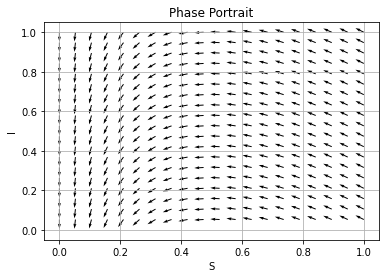

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter values
beta = 0.2
r = 1/10

# Define the differential equations for the reduced SI system
def dSdt(S, I):
    return -beta * S * I

def dIdt(S, I):
    return beta * S * I - r * I

# Generate a grid of S and I values
S = np.linspace(0, 1, 20)
I = np.linspace(0, 1, 20)
S, I = np.meshgrid(S, I)

# Compute the derivatives at each point on the grid
dS = dSdt(S, I)
dI = dIdt(S, I)

# Normalize the derivative vectors
norm = np.sqrt(dS**2 + dI**2)
dS = dS / norm
dI = dI / norm

# Plot the phase portrait
plt.figure()
plt.quiver(S, I, dS, dI)
plt.xlabel('S')
plt.ylabel('I')
plt.title('Phase Portrait')
plt.grid()
plt.show()


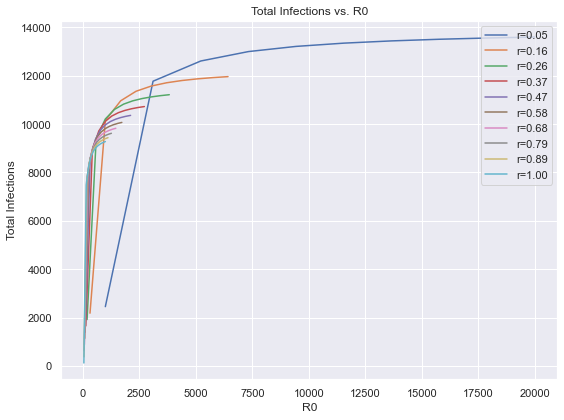

In [57]:
import matplotlib.pyplot as plt

def sir1(beta, r, N, days):
    I = [1 / N]
    S = [1.0 - I[0]]
    R = [0]
    T = [0]

    for t in range(days):
        s = S[t] - I[t] * beta * S[t]
        i = I[t] + I[t] * beta * S[t] - I[t] * r
        r = R[t] + I[t] * r

        S.append(s)
        I.append(i)
        R.append(r)
        T.append(t + 1)
    return I

N = 1000
rs = np.linspace(0.05, 1, 10)
betas = np.linspace(0.05, 1, 10)

plt.figure(figsize=(8, 6))

for r in rs:
    Is = []
    R_0s = []
    for beta in betas:
        I = sir1(beta, r, N, 100)
        R_0 = beta * N / r
        R_0s.append(R_0)
        Is.append(sum(I) * N)

    plt.plot(R_0s, Is, label=f'r={r:.2f}')

plt.xlabel('R0')
plt.ylabel('Total Infections')
plt.title('Total Infections vs. R0')
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()



# Task 2

## A), B)

<ipython-input-73-09a92d838131>:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 2, 1)
<ipython-input-73-09a92d838131>:68: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 2, 2)
<ipython-input-73-09a92d838131>:75: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created an

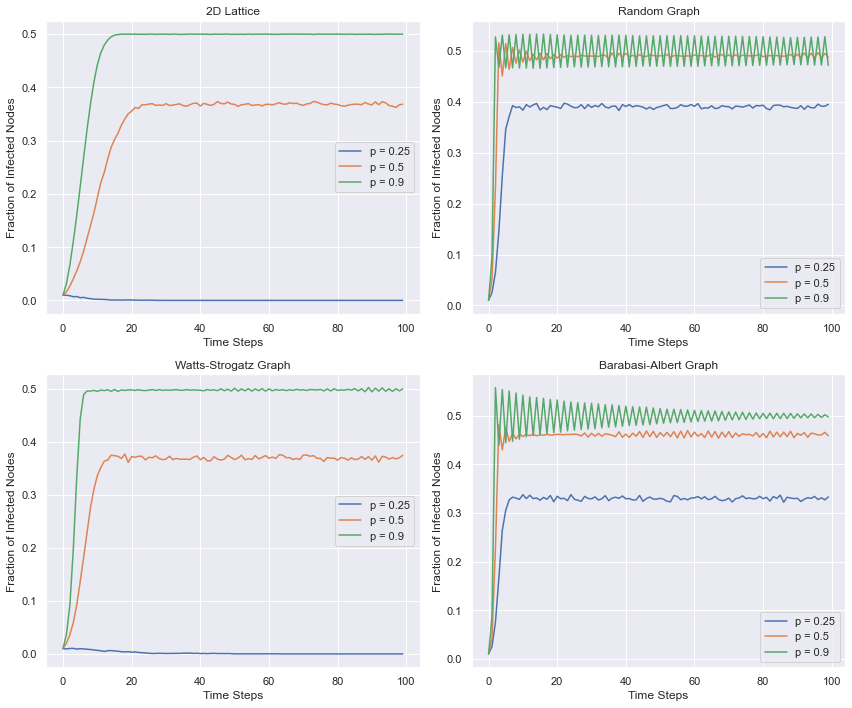

In [73]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def simulate_SIR(graph, p, num_simulations):
    num_nodes = len(graph.nodes)
    infected_fraction = np.zeros(num_nodes)
    
    for _ in range(num_simulations):
        infected = set()
        infected.add(np.random.choice(list(graph.nodes)))  # Select a random node to begin infection

        for i in range(num_nodes):
            infected_next = set()

            for u in infected:
                new_infected = [v for v in graph.neighbors(u) if v not in infected and np.random.random() < p]
                infected_next.update(new_infected)

            infected_fraction[i] += len(infected) / num_nodes
            infected = infected_next
    
    return infected_fraction / num_simulations

# (a) Simulate the model on a 2D lattice
lattice = nx.grid_2d_graph(10, 10)
lattice_1d = nx.convert_node_labels_to_integers(lattice, ordering='sorted')  # Convert to a 1D graph
p_values = [0.25, 0.5, 0.9]
infected_fractions_lattice = []

for p in p_values:
    infected_fractions_lattice.append(simulate_SIR(lattice_1d, p, num_simulations=100))

# (b) Simulate the model on a random graph
random_graph = nx.erdos_renyi_graph(100, 0.1)
infected_fractions_random = []

for p in p_values:
    infected_fractions_random.append(simulate_SIR(random_graph, p, num_simulations=100))

# (c) Simulate the model on a Watts-Strogatz graph
watts_strogatz_graph = nx.watts_strogatz_graph(100, 4, 0.3)
infected_fractions_ws = []

for p in p_values:
    infected_fractions_ws.append(simulate_SIR(watts_strogatz_graph, p, num_simulations=100))

# (d) Simulate the model on a Barabasi-Albert graph
barabasi_albert_graph = nx.barabasi_albert_graph(100, 5)
infected_fractions_ba = []

for p in p_values:
    infected_fractions_ba.append(simulate_SIR(barabasi_albert_graph, p, num_simulations=100))

# Plot the results
time_steps = range(len(infected_fractions_lattice[0]))

plt.figure(figsize=(12, 10))

for i, p in enumerate(p_values):
    plt.subplot(2, 2, 1)
    plt.plot(time_steps, infected_fractions_lattice[i], label='p = {}'.format(p))
    plt.xlabel('Time Steps')
    plt.ylabel('Fraction of Infected Nodes')
    plt.title('2D Lattice')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(time_steps, infected_fractions_random[i], label='p = {}'.format(p))
    plt.xlabel('Time Steps')
    plt.ylabel('Fraction of Infected Nodes')
    plt.title('Random Graph')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(time_steps, infected_fractions_ws[i], label='p = {}'.format(p))
    plt.xlabel('Time Steps')
    plt.ylabel('Fraction of Infected Nodes')
    plt.title('Watts-Strogatz Graph')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(time_steps, infected_fractions_ba[i], label='p = {}'.format(p))
    plt.xlabel('Time Steps')
    plt.ylabel('Fraction of Infected Nodes')
    plt.title('Barabasi-Albert Graph')
    plt.legend()

plt.tight_layout()
plt.show()


2D Lattice:<br />
As p increases, the infection spreads more easily, resulting in a higher fraction of infected nodes over time.<br />
For lower values of p (e.g., 0.25), the infection takes longer to spread, and the fraction of infected nodes increases gradually.<br />
For higher values of p (e.g., 0.9), the infection spreads rapidly, leading to a steep increase in the fraction of infected nodes.<br />

Random Graph:<br />
Similar to the 2D lattice, increasing p leads to a higher fraction of infected nodes over time.<br />
However, the infection dynamics in random graphs tend to be more stochastic and varied compared to structured networks like the lattice.<br />
For lower values of p, the infection might not spread widely, resulting in a slower increase in the fraction of infected nodes.<br />
As p increases, the infection can propagate more easily, resulting in a faster spread and higher fraction of infected nodes.<br />

Watts-Strogatz Graph:<br />
The Watts-Strogatz graph exhibits properties of both regular and random graphs.<br />
For lower values of p, the infection dynamics resemble those of regular graphs, with a gradual increase in the fraction of infected nodes over time.<br />
As p increases, the network transitions from a regular graph to a random graph, leading to a faster spread of infection and a higher fraction of infected nodes.<br />

Barabasi-Albert Graph:<br />
The Barabasi-Albert graph is a scale-free network, characterized by a few highly connected nodes (hubs) and many poorly connected nodes.<br />
Regardless of the value of p, the infection dynamics in the Barabasi-Albert graph are influenced by the presence of hubs.<br />
The infection tends to spread more readily from hubs to other nodes, resulting in a faster increase in the fraction of infected nodes compared to regular or random graphs.<br />

Overall, the results demonstrate how the network structure and the probability of contagion (p) influence the spread of infection. Structured networks with more regular connections, such as the 2D lattice, exhibit more predictable and gradual infection dynamics. On the other hand, random and scale-free networks allow for faster and more varied spread, with the Barabasi-Albert graph being particularly influenced by the presence of highly connected hubs.

## C)

**1. Shape of the Curve:**

- *ODE Model:* The infection curve follows a smooth pattern, characterized by a rapid increase in the number of infected individuals, reaching a peak, and then declining as individuals recover and become immune.
- *Network-based SIR Model:* In random and scale-free networks, the infection curve may exhibit more stochastic behavior, with fluctuations and irregularities. The spread of infection can vary across simulations due to network connections and inherent randomness.

**2. Peak and Duration of the Epidemic:**

- *ODE Model:* The peak of the epidemic occurs when a significant portion of the population is infected, and the rate of new infections starts to decline. The duration of the epidemic depends on parameters like the transmission rate and recovery rate.
- *Network-based SIR Model:* The peak of the epidemic may occur at different times and magnitudes across simulations due to the stochastic nature of the process and network topology. The duration of the epidemic can be influenced by the network structure and the probability of contagion (`p`). For instance, scale-free networks with highly connected nodes may lead to rapid spread and a shorter epidemic duration.

**3. Heterogeneity in Spread:**

- *ODE Model:* Assumes homogeneous mixing, where each individual has an equal probability of infecting any other individual in the population.
- *Network-based SIR Model:* The spread of infection is influenced by the network structure and specific connections between individuals, introducing heterogeneity. Individuals with more connections or those in central positions in the network have a higher likelihood of becoming infected and transmitting the disease.

In summary, the infection curves from the network-based SIR model display more stochastic behavior, fluctuations, and heterogeneity compared to the smooth and predictable patterns seen in the ODE model. The network-based model incorporates the influence of network structure and individual connections, providing a more realistic representation of disease spread in real-world scenarios.
